# Deep Learning with MNIST Dataset
    
    @Author - iKurious

# // Dream of this notebook
    * Import all needed libraries
    * Load dataset
    * Normalize 
    * Bulid the model - Flatten , Dense Layers, Output layer
    * Evaluate accuracy
    * Save the model 
    * Load the predit ! 

In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Define and load dataset

mnist = tf.keras.datasets.mnist

(x_train, y_train) , (x_test, y_text) = mnist.load_data()

In [22]:
# Check out the tensor

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

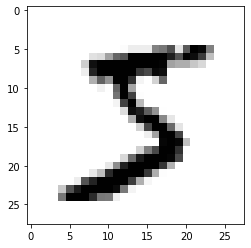

In [15]:
plt.imshow(x_train[0], cmap= plt.cm.binary)
plt.show()

In [16]:
# Normalize

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

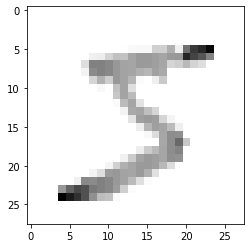

In [18]:
plt.imshow(x_train[0], cmap= plt.cm.binary)
plt.show()

# NOTE : After normalization the intensity got reduced . Can you tell why ?

In [19]:
print(x_train[0])  


# Now the number is inbetween 0 and 1

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [26]:
# Build the model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())          # Flatten makes the tensor linear 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # Relu for inbetween and default network
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # softmax -probability distribution / output layer


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])    
#Optimezer always try to minimize the loss 

model.fit(x_train, y_train, epochs=3)   # Train the model

Epoch 1/3
1875/1875 [==============================] - 2s 900us/step - loss: 0.2623 - accuracy: 0.9232
Epoch 2/3
1875/1875 [==============================] - 2s 896us/step - loss: 0.1077 - accuracy: 0.9670
Epoch 3/3
1875/1875 [==============================] - 2s 896us/step - loss: 0.0734 - accuracy: 0.9768


In [29]:
# Check your model accuracy

val_loss, val_acc = model.evaluate(x_test, y_text)
print(val_loss,"\n",
      val_acc)

313/313 [==============================] - 0s 596us/step - loss: 0.0885 - accuracy: 0.9729
0.08852337300777435 
 0.9728999733924866


In [31]:
# Save the model

model.save("MnistReader.model")


INFO:tensorflow:Assets written to: MnistReader.model/assets


Enter a number to predict 77
The predicted number is 2


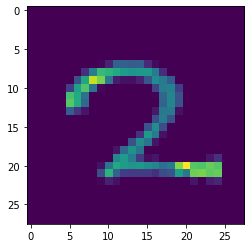

In [40]:
# Now load the model to predict

new_model = tf.keras.models.load_model('MnistReader.model')   # loading

prediction = new_model.predict([x_test])

Input = int(input("Enter a number to predict "))

plt.imshow(x_test[Input]) #plot the number
plt.show


print("The predicted number is",np.argmax(prediction[Input]))  #prediction
